In [0]:
# ! pip install --upgrade tensorflow

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
# cats_and_dogs_filtered
# |__ train
#     |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
#     |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
# |__ validation
#     |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
#     |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

In [0]:
zip_dir_base = os.path.dirname(zip_dir)

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print(base_dir)
print("--")
print(train_dir)
print(validation_dir)
print("--")
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)
print("--")
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print("--")
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

/root/.keras/datasets/cats_and_dogs_filtered
--
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation
--
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
--
total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
EPOCHS = 40

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')
 
validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [0]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           shuffle=True,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              batch_size=BATCH_SIZE,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              shuffle=True,
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________

In [0]:
history = model.fit_generator(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=EPOCHS,
    verbose=1,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))))

Epoch 1/40
20/20 [==============================] - 18s 916ms/step - loss: 0.8364 - acc: 0.4835 - val_loss: 0.6913 - val_acc: 0.5230
Epoch 2/40
20/20 [==============================] - 17s 860ms/step - loss: 0.6891 - acc: 0.5360 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 3/40
20/20 [==============================] - 18s 875ms/step - loss: 0.6899 - acc: 0.5055 - val_loss: 0.6683 - val_acc: 0.4990
Epoch 4/40
20/20 [==============================] - 17s 864ms/step - loss: 0.6799 - acc: 0.5540 - val_loss: 0.6619 - val_acc: 0.5980
Epoch 5/40
20/20 [==============================] - 17s 868ms/step - loss: 0.6728 - acc: 0.5590 - val_loss: 0.6523 - val_acc: 0.6100
Epoch 6/40
20/20 [==============================] - 17s 867ms/step - loss: 0.6603 - acc: 0.5780 - val_loss: 0.6466 - val_acc: 0.6140
Epoch 7/40
20/20 [==============================] - 17s 860ms/step - loss: 0.6578 - acc: 0.5715 - val_loss: 0.6416 - val_acc: 0.6170
Epoch 8/40
20/20 [==============================] - 17s 873ms/step - 

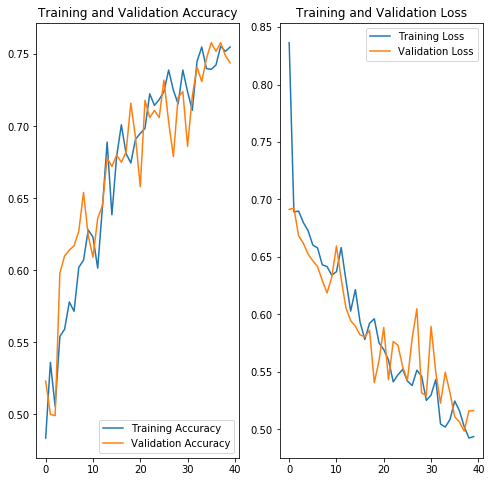

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()